# Global Population

This notebook explores historical global population trends using World Bank data (1960–2023). Through visualizations and statistical insights, we aim to uncover patterns, growth rates, and potential forecasting challenges for time series modeling. This analysis sets the foundation for selecting the best predictive models to understand future population dynamics.


In [1]:
import pandas as pd
from src.DataPreprocessor import DataPreprocessor

# World Bank

The World Bank is like a cooperative, made up of 189 member countries. These member countries, or shareholders, are represented by a Board of Governors, who are the ultimate policymakers at the World Bank. Generally, the governors are member countries' ministers of finance or ministers of development. They meet once a year at the Annual Meetings of the Boards of Governors of the World Bank Group and the International Monetary Fund.

Source:
https://data.worldbank.org/indicator/SP.POP.TOTL

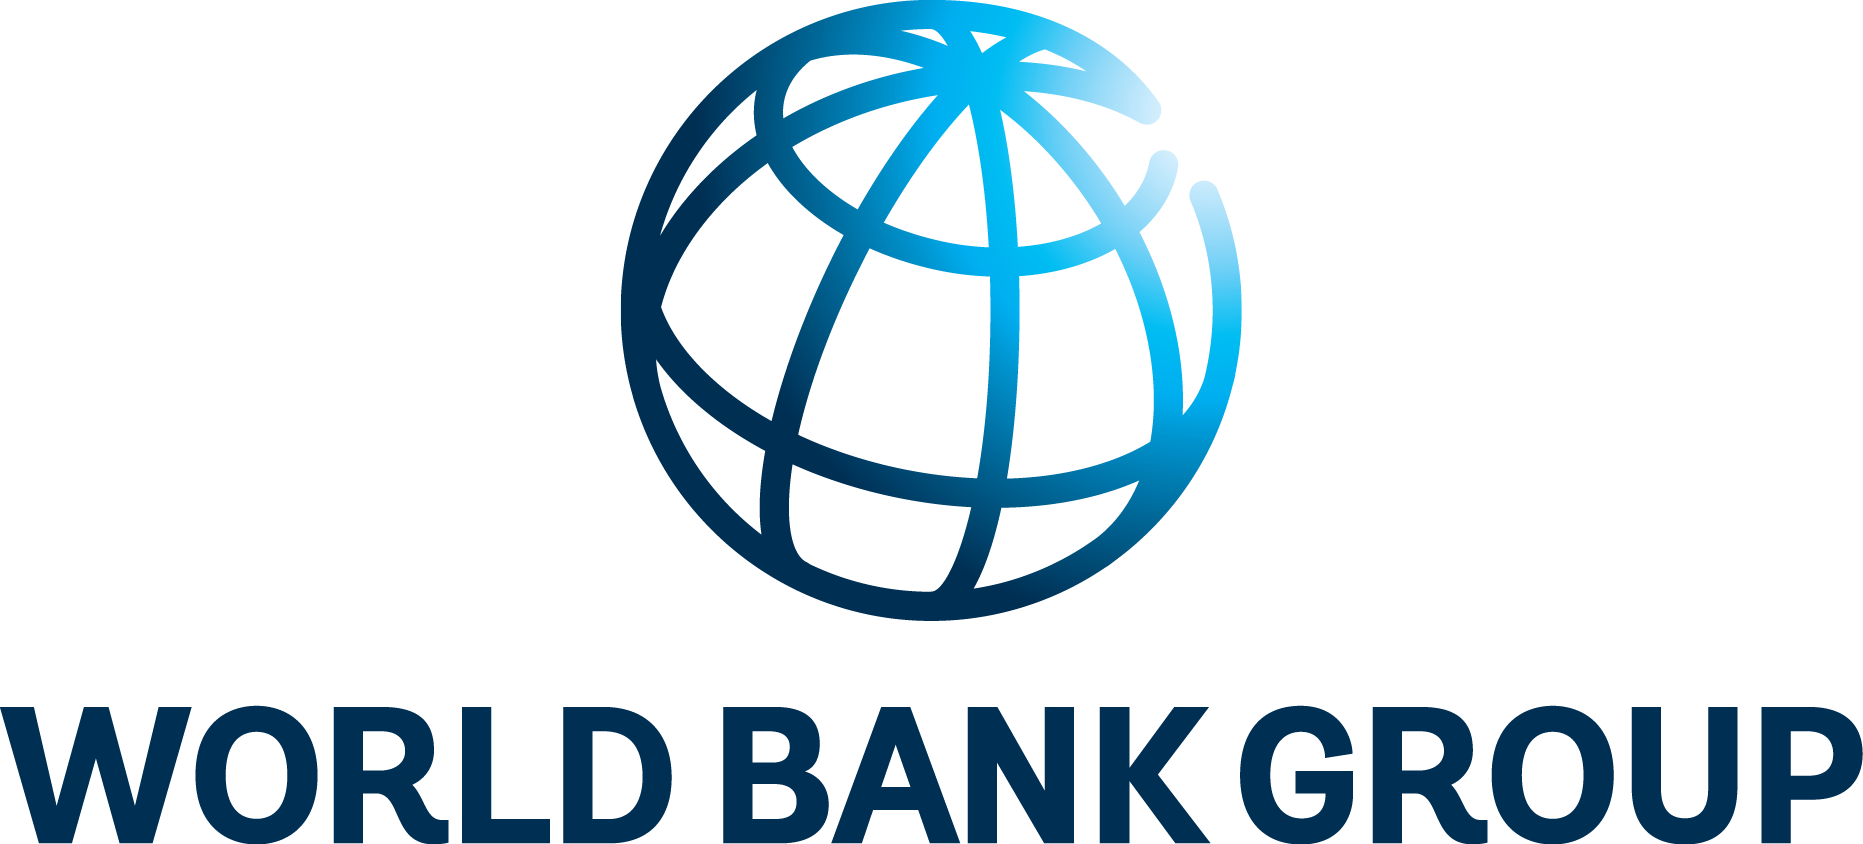

In [2]:
# datasets
df1 = pd.read_csv('/Users/luislasso/Repos/Proyecto_Final_Modelos_Predictivos/data/API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv')
df2 = pd.read_csv('/Users/luislasso/Repos/Proyecto_Final_Modelos_Predictivos/data/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_76253.csv')

# Population Totals Dataset

This dataset contains information about country name and population from 1960 to 2023. The data is strucutred but years as used as columns names.

In [3]:
df1.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130072080.0,133534923.0,137171659.0,140945536.0,144904094.0,149033472.0,...,607123269.0,623369401.0,640058741.0,657801085.0,675950189.0,694446100.0,713090928.0,731821393.0,750503764.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,9035043.0,9214083.0,9404406.0,9604487.0,9814318.0,10036008.0,...,33831764.0,34700612.0,35688935.0,36743039.0,37856121.0,39068979.0,40000412.0,40578842.0,41454761.0,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,97630925.0,99706674.0,101854756.0,104089175.0,106388440.0,108772632.0,...,418127845.0,429454743.0,440882906.0,452195915.0,463365429.0,474569351.0,485920997.0,497387180.0,509398589.0,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5231654.0,5301583.0,5354310.0,5408320.0,5464187.0,5521981.0,...,28157798.0,29183070.0,30234839.0,31297155.0,32375632.0,33451132.0,34532429.0,35635029.0,36749906.0,NaN


# Country Code Dataset

This dataset contains entity data for each country adding additional context to the analysis.

In [4]:
df2.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


# Data Preprossing.

Before analyzing the dataset I have created a data preprocessing class. This class contains a pipeline that unpivots the years on the facts dataset and joins the entity information from the second dataset.

In [5]:
# preprocessing
preprocessor = DataPreprocessor(df_fact=df1, df_dim=df2)


In [6]:
# Data Preprod Pipeline
df_cleaned = preprocessor.run_pipeline(
    id_vars=["Country Name", "Country Code", "Indicator Name", "Indicator Code"],
    value_vars=[str(i) for i in range(1960, 2023)],
    join_key='Country Code',
    how="left"
)

In [7]:
df_cleaned.head()

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Population,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,Aruba,ABW,"Population, total",SP.POP.TOTL,1960,54922.0,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,1960,130072080.0,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,1960,9035043.0,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,1960,97630925.0,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,1960,5231654.0,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola,NaN


In [8]:
df_panama = df_cleaned[df_cleaned["Country Name"]=="Panama"]

# EDA Analysis

This EDA will explore the following areas:

* Data Understanding
* Data Quality Checks
* Descriptive Statistics
* Trend Analysis
* Comparative Analysis
* Geospatial Analysis
* Predictice Insights




In [9]:
print("Dataset Info \n")
df_panama.info()

Dataset Info 

<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 185 to 16677
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    63 non-null     object 
 1   Country Code    63 non-null     object 
 2   Indicator Name  63 non-null     object 
 3   Indicator Code  63 non-null     object 
 4   Year            63 non-null     object 
 5   Population      63 non-null     float64
 6   Region          63 non-null     object 
 7   IncomeGroup     63 non-null     object 
 8   SpecialNotes    0 non-null      object 
 9   TableName       63 non-null     object 
 10  Unnamed: 5      0 non-null      float64
dtypes: float64(2), object(9)
memory usage: 5.9+ KB


In [10]:
df_panama.describe()

,Population,Unnamed: 5
count,6.300000e+01,0.0
mean,2.602891e+06,NaN
std,9.820587e+05,NaN
min,1.126005e+06,NaN
25%,1.754662e+06,NaN
50%,2.508265e+06,NaN
75%,3.406257e+06,NaN
max,4.400773e+06,NaN


In [11]:
df_panama.isna().mean()

Country Name      0.0
Country Code      0.0
Indicator Name    0.0
Indicator Code    0.0
Year              0.0
Population        0.0
Region            0.0
IncomeGroup       0.0
SpecialNotes      1.0
TableName         0.0
Unnamed: 5        1.0
dtype: float64

In [12]:
df_panama.nunique()

Country Name       1
Country Code       1
Indicator Name     1
Indicator Code     1
Year              63
Population        63
Region             1
IncomeGroup        1
SpecialNotes       0
TableName          1
Unnamed: 5         0
dtype: int64

In [13]:
df_panama["Region"].unique()

array(['Latin America & Caribbean'], dtype=object)

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

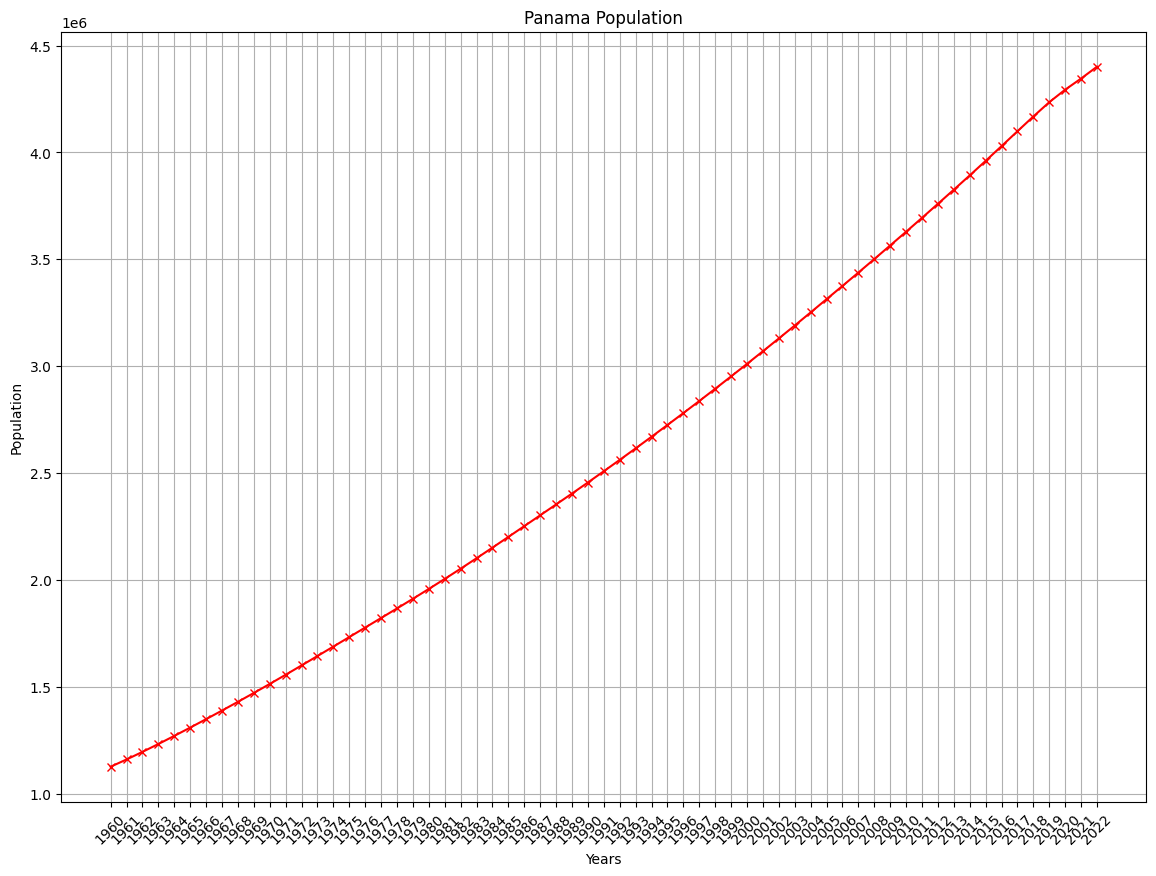

In [22]:
plt.figure(figsize=(14, 10))
plt.plot(df_panama["Year"], df_panama["Population"], marker="x", linestyle="-", color="r")
plt.xticks(rotation=45)
plt.title("Panama Population")
plt.xlabel("Years")
plt.ylabel("Population")
plt.grid(True)
plt.show()


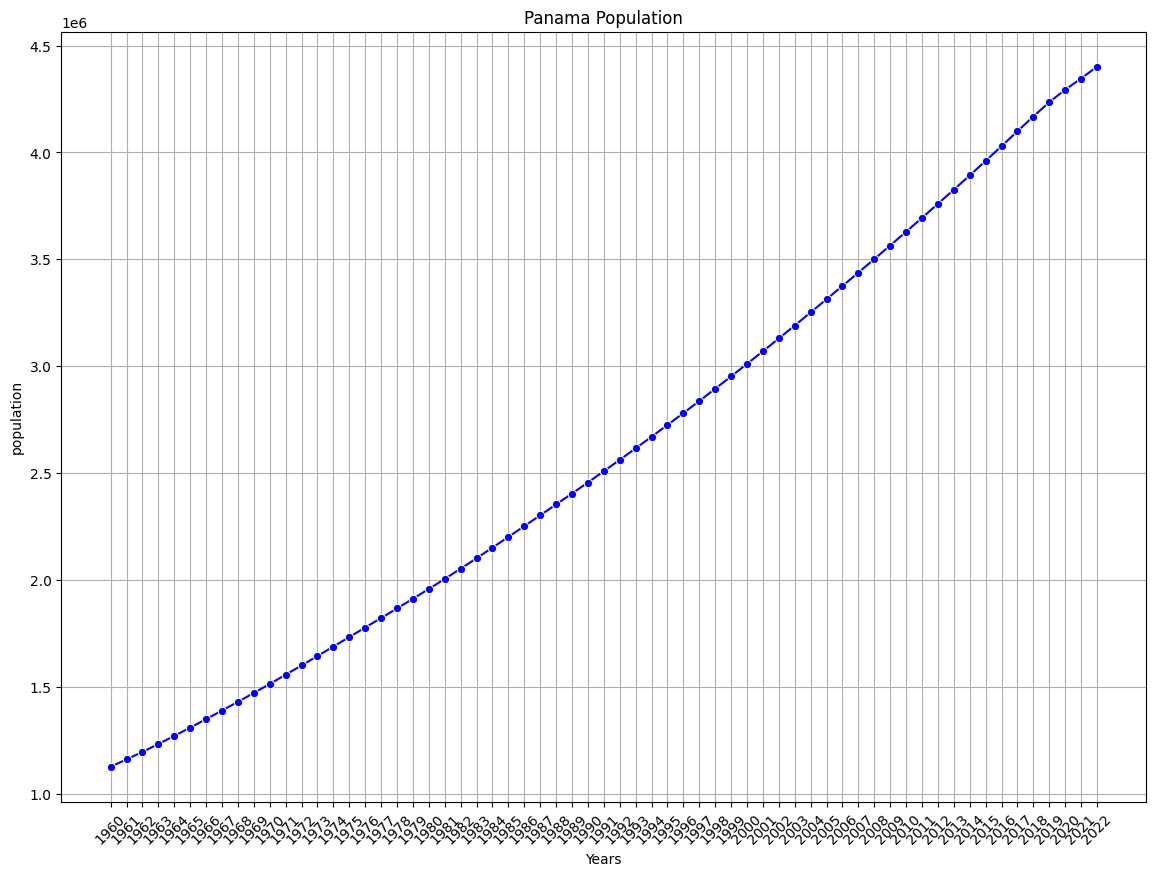

In [23]:
plt.figure(figsize=(14, 10))
sns.lineplot(x=df_panama['Year'], y=df_panama["Population"], marker='o', color='b')
plt.xticks(rotation=45)
plt.title('Panama Population')
plt.xlabel('Years')
plt.ylabel('population')
plt.grid(True)
plt.show()

# Trend and Seasonality 

Population in Panama is clearly trending up and shows no seasonality between 1960 and 2022.

/var/folders/3n/y5ywh02x62317g7bmb_rrspr0000gn/T/ipykernel_94721/3441170760.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_panama['Year'] = pd.to_datetime(df_panama['Year'], format='%Y')


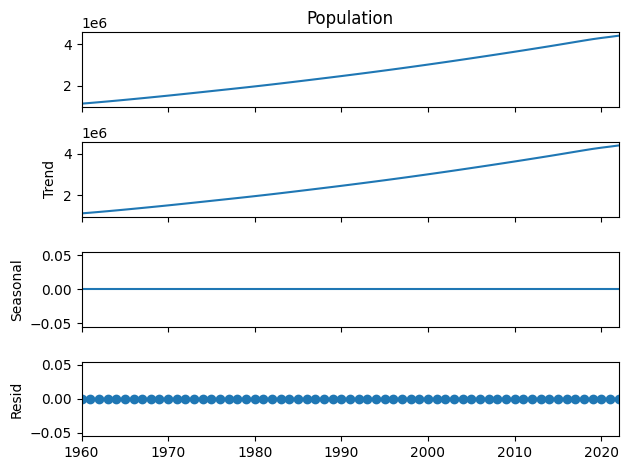

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

df_panama['Year'] = pd.to_datetime(df_panama['Year'], format='%Y')
df_panama.set_index('Year', inplace=True)
decomposition = seasonal_decompose(df_panama['Population'], model='additive', period=1)

decomposition.plot()
plt.show()

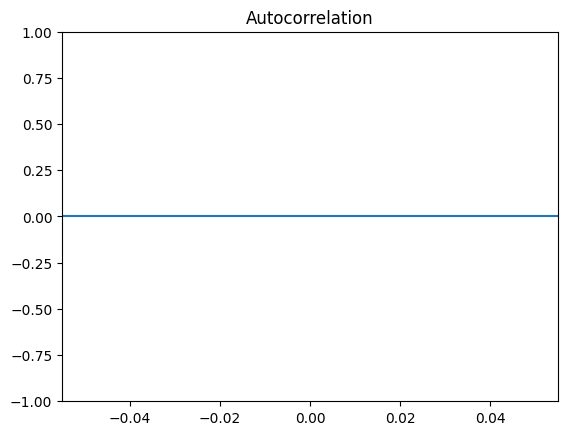

In [25]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_cleaned['Population'], lags=20)
plt.show()

In [27]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_panama['Population'])
print('ADF Statistics: ',result[0])
print('p-value:', result[1])

ADF Statistics:  0.8096451354806651
p-value: 0.9917902740563378


In [28]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_panama['Population'], order=(1,1,1))
result = model.fit()
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:             Population   No. Observations:                   63
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -913.476
Date:                Sun, 23 Mar 2025   AIC                           1832.952
Time:                        14:43:29   BIC                           1839.333
Sample:                    01-01-1960   HQIC                          1835.457
                         - 01-01-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000   1.83e-06   5.48e+05      0.000       1.000       1.000
ma.L1         -0.9998      0.000  -2398.524      0.000      -1.001      -0.999
sigma2      7.966e+06   1.22e-12   6.55e+18      0.0

/Users/luislasso/Repos/Proyecto_Final_Modelos_Predictivos/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/luislasso/Repos/Proyecto_Final_Modelos_Predictivos/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/luislasso/Repos/Proyecto_Final_Modelos_Predictivos/venv/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/luislasso/Repos/Proyecto_Final_Modelos_Predictivos/venv/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelih

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(df_panama['Population'], trend='add', seasonal='add', seasonal_periods=12)
results=model.fit()
results.summary()

/Users/luislasso/Repos/Proyecto_Final_Modelos_Predictivos/venv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/Users/luislasso/Repos/Proyecto_Final_Modelos_Predictivos/venv/lib/python3.11/site-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Population,No. Observations:,63
Model:,ExponentialSmoothing,SSE,53991259801.183
Optimized:,True,AIC,1327.844
Trend:,Additive,BIC,1362.134
Seasonal:,Additive,AICC,1343.390
Seasonal Periods:,12,Date:,"Sun, 23 Mar 2025"
Box-Cox:,False,Time:,14:46:15
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9950000,alpha,True
smoothing_trend,0.1066071,beta,True
